9 - Hay mas en ventas PH/departamentos con mas o menos ambientes?  --> Ariel

10 - Hay mas en ventas casas/locales con mas o menos ambientes? --> Ariel

In [14]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
sells = pd.read_csv('data/Propiedades-0701.csv')
# con esto borro una columna del dataframe (id, operation, place_with_parents_name, country_name, geonames_id(ver si sirve)
# lat-lon, price_aprox_local_currency, price_usd_per_m2, price_per_m2, floor, description, title, image_thumbnail)
sells = sells.drop(sells.columns[[0, 2, 5, 6, 8, 9, 10, 11, 14, 18, 19, 20, 23, 24, 25, 26]], axis=1) 


In [316]:
#filtro los NAN de price and rooms que voy a utilizar
sells = sells[np.isfinite(sells['price'])]
sells = sells[np.isfinite(sells['rooms'])]
#filtro los de CABA/GBA
#uso regex para buscar coincidencias por string
sells_caba = sells.loc[sells['state_name'].str.contains(r'(Capital Federal|capital federal)')]
#filtro barrio Capital Federal de caba
sells_caba = sells_caba[sells_caba['place_name']!='Capital Federal']
#filtro los de la fecha indicada
sells_caba = sells_caba.loc[(sells_caba['created_on'] < '2017-07-01') & (sells_caba['created_on'] >= '2017-06-01')]
sells_caba.head(5)

/home/ariel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,created_on,property_type,place_name,state_name,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,expenses
60358,2017-06-01,apartment,Flores,Capital Federal,220000.0,USD,220000.0,NaN,123.0,4.0,NaN
60359,2017-06-01,apartment,Constitución,Capital Federal,70000.0,USD,70000.0,NaN,70.0,2.0,NaN
60360,2017-06-01,apartment,Caballito,Capital Federal,138000.0,USD,138000.0,NaN,65.0,3.0,NaN
60364,2017-06-01,house,Almagro,Capital Federal,395000.0,USD,395000.0,NaN,20.0,7.0,NaN
60365,2017-06-01,apartment,San Nicolás,Capital Federal,65000.0,USD,65000.0,NaN,39.0,2.0,NaN


In [379]:

#ahora con todo filtrado debo obtener el promedio por zonas.
sells_caba_rooms = sells_caba.loc[:,['place_name','rooms','property_type']]
sells_caba_rooms_val = sells_caba_rooms.groupby('place_name')
plt_caba = sells_caba_rooms.groupby(['place_name', 'property_type']).mean().unstack().plot(kind='bar',figsize=(18,10), stacked=True)

import matplotlib.pyplot as plt
plt_caba.set_xlabel("Barrio CABA", fontsize=12)
plt_caba.set_ylabel("Promedio de ambientes", fontsize=12)
plt_caba.legend(['PH', 'apartment', 'house', 'store'])
plt.show()


TypeError: 'DataFrame' object is not callable

/home/ariel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ariel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


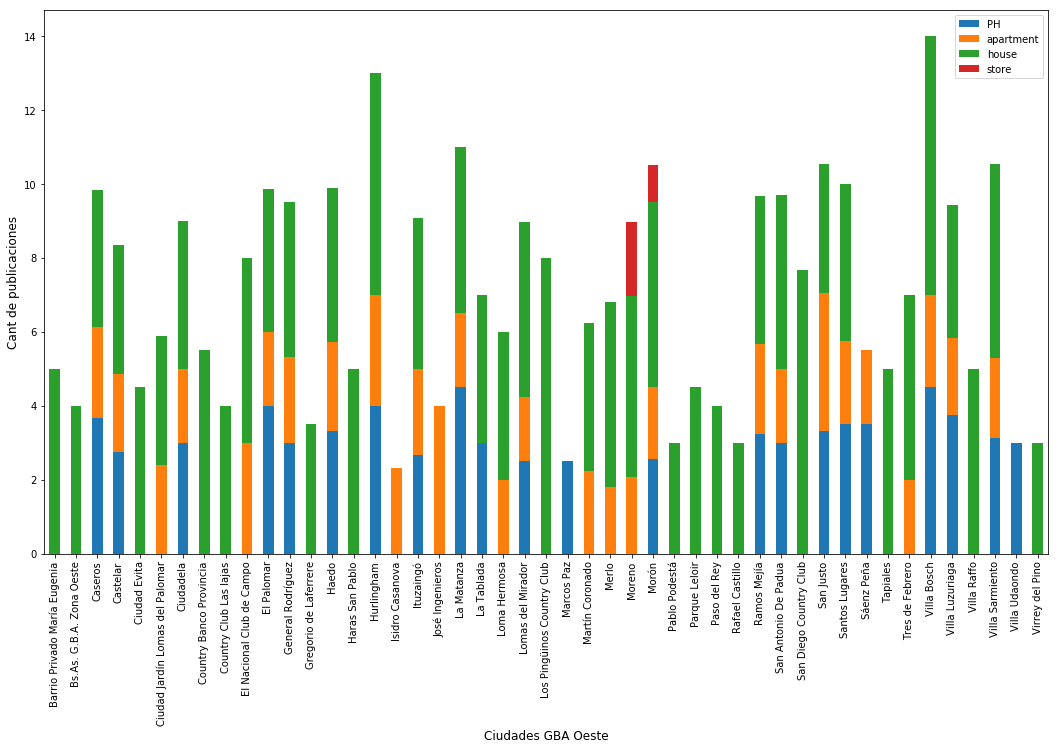

In [373]:
#ahora hago lo mismo con GBA
#uso regex para buscar coincidencias por string
sells_gba = sells.loc[sells['state_name'].str.contains(r'(G.B.A|g.b.a)')]
#filtro los de la fecha indicada
sells_gba = sells_gba.loc[(sells_gba['created_on'] < '2017-07-01') & (sells_gba['created_on'] >= '2017-06-01')]
sells_gba_west = sells_gba.loc[sells['state_name'].str.contains(r'(Oeste|oeste)')]
#sells_gba_west.head()
#ahora con todo filtrado debo obtener el promedio por zonas.
sells_gba_west_rooms = sells_gba_west.loc[:,['place_name','rooms','property_type']]
plt_gba_west = sells_gba_west_rooms.groupby(['place_name', 'property_type']).mean().unstack().plot(kind='bar',figsize=(18,10), stacked=True)

import matplotlib.pyplot as plt
plt_gba_west.set_xlabel("Ciudades GBA Oeste", fontsize=12)
plt_gba_west.set_ylabel("Cant de publicaciones", fontsize=12)
plt_gba_west.legend(['PH', 'apartment', 'house', 'store'])
plt.show()

/home/ariel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


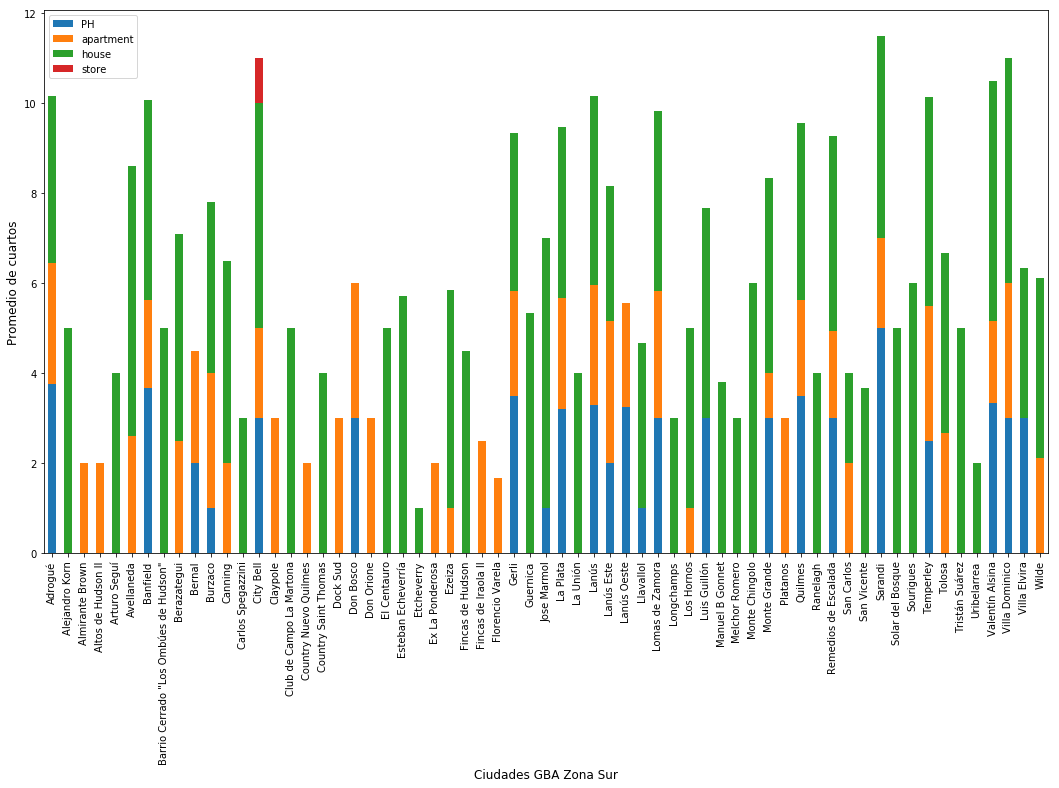

In [375]:
sells_gba_south = sells_gba.loc[sells['state_name'].str.contains(r'(Sur|sur)')]
#sells_gba_west.head()
#ahora con todo filtrado debo obtener el promedio por zonas.
sells_gba_south_rooms = sells_gba_south.loc[:,['place_name','rooms','property_type']]
plt_gba_south = sells_gba_south_rooms.groupby(['place_name', 'property_type']).mean().unstack().plot(kind='bar',figsize=(18,10), stacked=True)

import matplotlib.pyplot as plt
plt_gba_south.set_xlabel("Ciudades GBA Zona Sur", fontsize=12)
plt_gba_south.set_ylabel("Promedio de cuartos", fontsize=12)
plt_gba_south.legend(['PH', 'apartment', 'house', 'store'])
plt.show()

11 - Promedios de balcones(depto)/patios(casas,PH) de las propiedades en ventas? --> Ariel